# Image Classification Using Convolutional Neural Network (CNN)

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

![](cifar.jpg)

In [36]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

![](cifar1.png)

Load the dataset

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 52s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [34]:
def plot_sample(X, y, index):
    plt.figure(figsize = (13,1))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

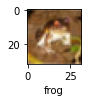

In [35]:
plot_sample(X_train, y_train, 0)

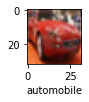

In [12]:
plot_sample(X_train, y_train, 5)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

# Normalizing the training data

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Build simple artificial neural network for image classification

In [14]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 74s 46ms/step - loss: 1.8111 - accuracy: 0.3542
Epoch 2/5
1563/1563 [==============================] - 70s 45ms/step - loss: 1.6220 - accuracy: 0.4279
Epoch 3/5
1563/1563 [==============================] - 72s 46ms/step - loss: 1.5408 - accuracy: 0.4558
Epoch 4/5
1563/1563 [==============================] - 71s 46ms/step - loss: 1.4830 - accuracy: 0.4771
Epoch 5/5
1563/1563 [==============================] - 72s 46ms/step - loss: 1.4337 - accuracy: 0.4959


You can see that at the end of 5 epochs, accuracy is at around 49%

In [15]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 5s 12ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.55      0.55      1000
           1       0.56      0.66      0.61      1000
           2       0.43      0.29      0.35      1000
           3       0.36      0.17      0.23      1000
           4       0.52      0.30      0.38      1000
           5       0.27      0.66      0.38      1000
           6       0.50      0.59      0.54      1000
           7       0.66      0.44      0.53      1000
           8       0.53      0.68      0.60      1000
           9       0.67      0.32      0.43      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



Now let us build a convolutional neural network to train our images

In [16]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [17]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.4344 - accuracy: 0.4883
Epoch 2/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.0857 - accuracy: 0.6210
Epoch 3/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9556 - accuracy: 0.6686
Epoch 4/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8704 - accuracy: 0.6981
Epoch 5/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8007 - accuracy: 0.7222
Epoch 6/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7485 - accuracy: 0.7406
Epoch 7/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.6982 - accuracy: 0.7577
Epoch 8/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.6577 - accuracy: 0.7714
Epoch 9/10
1563/1563 [==============================] - 27s 18ms/step - loss: 0.6194 - accuracy: 0.7834
Epoch 10/10
1563/1563 [==============================] - 27s 18m

With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [19]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 5s 10ms/step - loss: 0.9163 - accuracy: 0.7017


[0.9163099527359009, 0.70169997215271]

In [20]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 10ms/step


array([[2.06327459e-05, 3.35423965e-06, 1.64570694e-03, 8.51874352e-01,
        3.75715463e-04, 1.03179134e-01, 3.25281732e-02, 7.80548609e-04,
        9.53238551e-03, 6.00996245e-05],
       [3.39557813e-03, 8.34554210e-02, 6.16630859e-05, 8.25197912e-06,
        1.20812165e-05, 6.71166219e-07, 3.57886336e-07, 7.98038855e-07,
        9.12131727e-01, 9.33487609e-04],
       [9.85758752e-03, 7.67468870e-01, 6.71899877e-04, 3.23988451e-03,
        1.86109380e-03, 2.77060433e-04, 1.00992771e-03, 1.40599802e-03,
        1.66739777e-01, 4.74678278e-02],
       [7.89399326e-01, 2.67154258e-03, 4.23271433e-02, 9.08420072e-04,
        7.93234445e-03, 1.62750657e-05, 1.66310533e-03, 2.91433607e-05,
        1.54929698e-01, 1.22919024e-04],
       [3.04724495e-08, 1.36322260e-05, 1.50102496e-04, 5.71044488e-03,
        5.08764293e-03, 1.28747371e-04, 9.88903463e-01, 8.30573583e-08,
        5.82916573e-06, 2.65684577e-08]], dtype=float32)

In [21]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [22]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

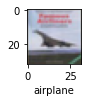

In [23]:
plot_sample(X_test, y_test,3)

In [24]:
classes[y_classes[3]]

'airplane'

In [25]:
classes[y_classes[3]]

'airplane'

In [26]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(, y_classes))

SyntaxError: invalid syntax (Temp/ipykernel_26928/2347245123.py, line 6)